In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
# IBMQ.delete_account()
IBMQ.save_account('184ffbf3faf19fd5d79c4a196403b71e67906173e556ce13b7063b68351e2e637ebfa8e5099c52fa0cff26166457db387390c9c00e291d7acd8de779934ecc54', overwrite=True)
IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
from qiskit import QuantumRegister, ClassicalRegister

from qiskit.test.mock import FakeMontreal
device_backend = FakeMontreal()

from qiskit.providers.aer import AerSimulator
sim_Montreal = AerSimulator.from_backend(device_backend)

from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import BasicSwap, LookaheadSwap, StochasticSwap

In [125]:
repetitions = 1

dq = QuantumRegister(5,'data_qubit')
aq = QuantumRegister(4,'ancilla_qubit')
sb = ClassicalRegister(4,'syndrome_bit')
cb = ClassicalRegister(5,'classical_bit')
qc = QuantumCircuit(dq,aq,sb,cb)
qc.cx(dq[0],dq[1])
qc.cx(dq[1],dq[2])
qc.cx(dq[2],dq[3])
qc.cx(dq[3],dq[4])



for i in range(repetitions):

    
    qc.barrier()
    qc.cx(dq[0],aq[0])
    qc.cx(dq[1],aq[0])
    qc.cx(dq[1],aq[1])
    qc.cx(dq[2],aq[1])
    qc.cx(dq[2],aq[2])
    qc.cx(dq[3],aq[2])
    qc.cx(dq[3],aq[3])
    qc.cx(dq[4],aq[3])
    qc.barrier()
    
    qc.measure(aq[0],sb[0])
    qc.measure(aq[1],sb[1])
    qc.measure(aq[2],sb[2])
    qc.measure(aq[3],sb[3])
    
    qc.x(dq[0]).c_if(sb, 1)
    qc.x(dq[1]).c_if(sb, 3)
    qc.x(dq[2]).c_if(sb, 6)
    qc.x(dq[3]).c_if(sb, 12)
    qc.x(dq[4]).c_if(sb, 8)
    
    qc.x(dq[0]).c_if(sb, 2)
    qc.x(dq[1]).c_if(sb, 2)
    
    qc.x(dq[0]).c_if(sb, 7)
    qc.x(dq[2]).c_if(sb, 7)
    
    qc.x(dq[0]).c_if(sb, 13)
    qc.x(dq[3]).c_if(sb, 13)
    
    qc.x(dq[0]).c_if(sb, 9)
    qc.x(dq[4]).c_if(sb, 9)
    
    qc.x(dq[1]).c_if(sb, 5)
    qc.x(dq[2]).c_if(sb, 5)
    
    qc.x(dq[1]).c_if(sb, 15)
    qc.x(dq[3]).c_if(sb, 15)
    
    qc.x(dq[1]).c_if(sb, 11)
    qc.x(dq[4]).c_if(sb, 11)
    
    qc.x(dq[2]).c_if(sb, 10)
    qc.x(dq[3]).c_if(sb, 10)
    
    qc.x(dq[2]).c_if(sb, 14)
    qc.x(dq[4]).c_if(sb, 14)
    
    qc.x(dq[3]).c_if(sb, 4)
    qc.x(dq[4]).c_if(sb, 4)
    qc.reset(aq)
    



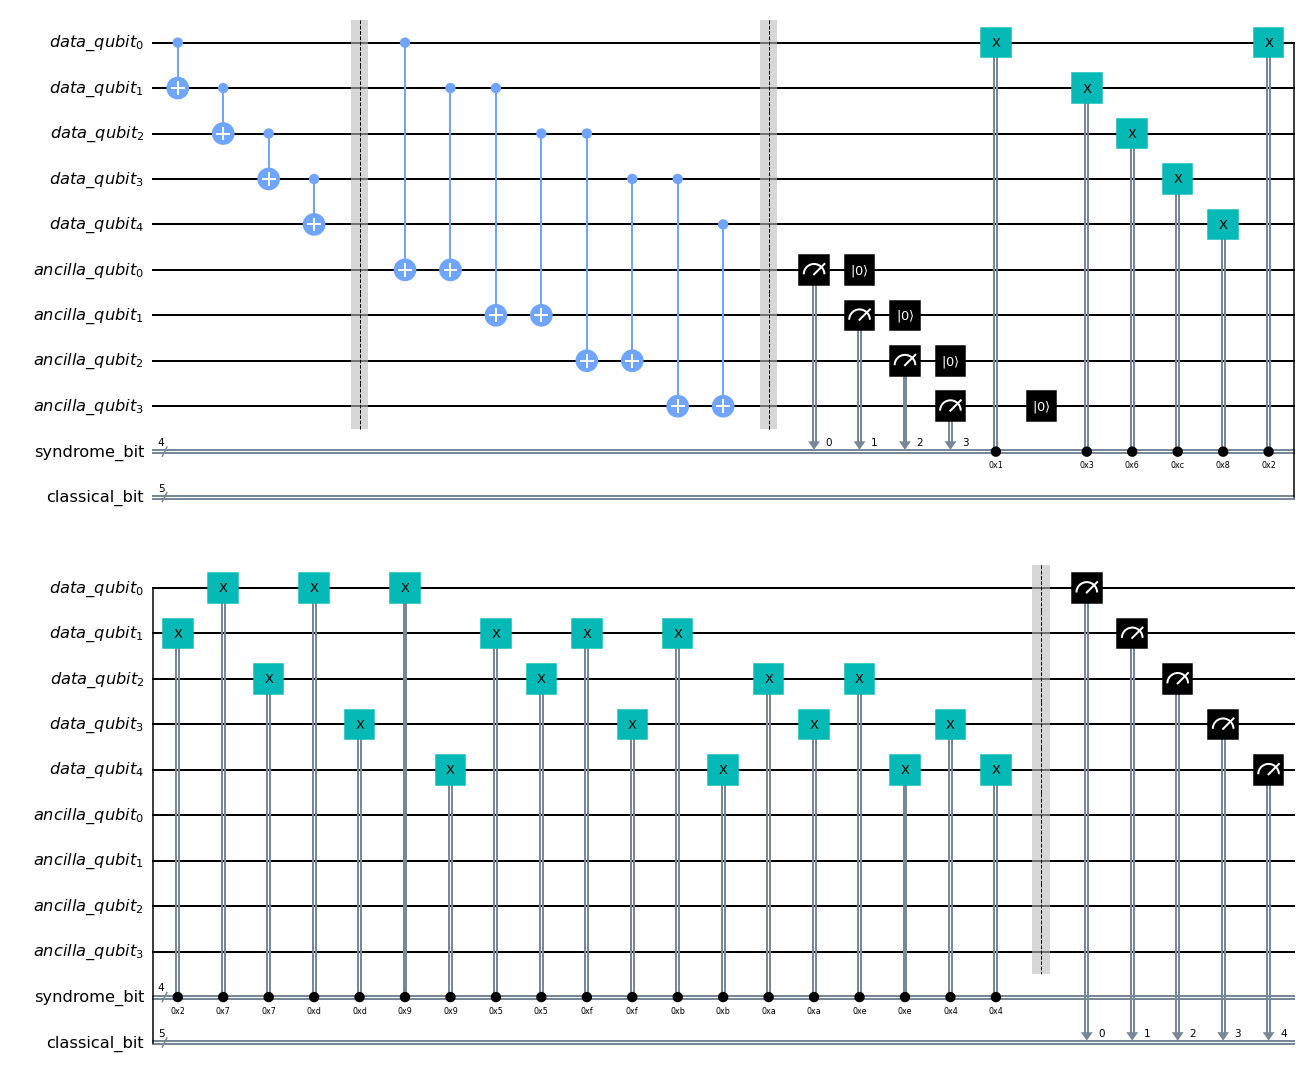

In [126]:
qc.barrier()
qc.measure(dq[0],cb[0])
qc.measure(dq[1],cb[1])
qc.measure(dq[2],cb[2])
qc.measure(dq[3],cb[3])
qc.measure(dq[4],cb[4])
qc.draw()

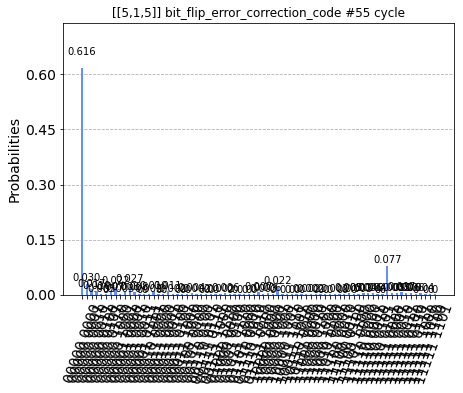

In [120]:
# Transpile the circuit for the noisy basis gates
tcirc = transpile(qc, sim_Montreal)
shots = 1024
# Execute noisy simulation and get counts
result_noise = sim_Montreal.run(tcirc, shots=shots).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="[[5,1,5]] bit_flip_error_correction_code #55 cycle")

In [121]:
correct_count = 0
for key in counts_noise.keys():
    data = key[0:5]
    if data == '00000':
        correct_count += counts_noise[key]
    

In [122]:
correct_count

726